<a href="https://colab.research.google.com/github/suhas259/ML_sentiment_analysis/blob/main/ML_lab9_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_excel("/content/drive/MyDrive/embeddingsdata.xlsx")
data

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_758,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767
0,0.009625,-0.029216,0.027109,0.023631,-0.004972,0.031757,-0.045125,0.044483,0.019400,-0.017189,...,-0.045697,-0.001972,-0.008154,-0.056139,0.009890,0.042366,0.040134,0.009304,-0.016137,-0.009309
1,-0.007535,-0.039844,0.030167,0.031224,0.004742,0.028289,-0.068723,0.039153,0.019596,-0.027138,...,-0.056834,0.008613,-0.006578,-0.034220,0.027574,0.045456,0.027402,0.017837,-0.035009,-0.010062
2,0.022408,-0.030840,0.032328,0.046965,0.007798,0.025860,-0.065093,0.035118,0.035359,-0.029205,...,-0.016249,0.020413,-0.034288,-0.050649,0.028408,0.040412,0.030261,0.003535,-0.034122,-0.017289
3,0.019677,-0.034055,0.012662,0.070387,-0.011170,0.017842,-0.050945,0.044878,0.034781,-0.025772,...,-0.038879,0.002963,-0.018754,-0.053278,0.033005,0.031635,0.022544,-0.011774,-0.011125,-0.017540
4,0.017678,-0.030323,0.012829,0.065267,-0.025161,0.011964,-0.050590,0.042820,0.029161,-0.015004,...,-0.042079,0.010192,-0.010147,-0.035857,0.021784,0.034621,0.017342,-0.009884,-0.010316,-0.029238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.019743,-0.071799,0.022546,0.049042,-0.005767,-0.016275,-0.037731,0.029718,0.009203,-0.030913,...,-0.040456,-0.001192,-0.026138,-0.056447,0.015818,0.045241,0.012620,-0.004837,-0.014540,-0.046791
896,0.000186,-0.027604,0.010623,0.038237,-0.026675,0.020215,-0.040816,0.032210,0.041016,-0.014836,...,-0.026985,0.015479,-0.003967,-0.037808,0.021234,0.031012,-0.010890,0.003081,-0.015145,-0.045444
897,0.018066,-0.032152,0.039794,0.047608,0.003898,0.024092,-0.056508,0.020527,0.031972,-0.026038,...,-0.041547,0.011308,-0.016882,-0.059904,0.009558,0.039976,0.029574,0.013737,-0.003724,-0.017324
898,-0.003492,-0.022739,0.021777,0.044054,-0.005621,0.013863,-0.079196,0.039150,0.004557,-0.015787,...,-0.057920,0.004005,-0.007196,-0.041652,0.020945,0.047604,0.019767,0.005806,-0.019280,-0.016415


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_excel("/content/drive/MyDrive/sentimental dataset.xlsx")
df

,Id,Judgment,Sentiment
0,1,"""1. Being aggrieved by the judgment delivered ...",0
1,2,"""This was an appeal from a judgment and decree...",1
2,3,"""This was an application under article 32 (1) ...",2
3,4,"""APPEAL from a judgment of the High Court of H...",0
4,5,"""APPEAL under article 374(4) of the Constituti...",1
...,...,...,...
895,896,documents in column 3 thereof. The petitioner ...,1
896,897,for such unauthorised construction before the ...,1
897,898,"Mr. Jayanta Kr. Mitra, Sr. Advocate with Mr. R...",0
898,899,Considering the averments contained in the app...,0


In [6]:
data['Score'] = df['Sentiment']
data

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767,Score
0,0.009625,-0.029216,0.027109,0.023631,-0.004972,0.031757,-0.045125,0.044483,0.019400,-0.017189,...,-0.001972,-0.008154,-0.056139,0.009890,0.042366,0.040134,0.009304,-0.016137,-0.009309,0
1,-0.007535,-0.039844,0.030167,0.031224,0.004742,0.028289,-0.068723,0.039153,0.019596,-0.027138,...,0.008613,-0.006578,-0.034220,0.027574,0.045456,0.027402,0.017837,-0.035009,-0.010062,1
2,0.022408,-0.030840,0.032328,0.046965,0.007798,0.025860,-0.065093,0.035118,0.035359,-0.029205,...,0.020413,-0.034288,-0.050649,0.028408,0.040412,0.030261,0.003535,-0.034122,-0.017289,2
3,0.019677,-0.034055,0.012662,0.070387,-0.011170,0.017842,-0.050945,0.044878,0.034781,-0.025772,...,0.002963,-0.018754,-0.053278,0.033005,0.031635,0.022544,-0.011774,-0.011125,-0.017540,0
4,0.017678,-0.030323,0.012829,0.065267,-0.025161,0.011964,-0.050590,0.042820,0.029161,-0.015004,...,0.010192,-0.010147,-0.035857,0.021784,0.034621,0.017342,-0.009884,-0.010316,-0.029238,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.019743,-0.071799,0.022546,0.049042,-0.005767,-0.016275,-0.037731,0.029718,0.009203,-0.030913,...,-0.001192,-0.026138,-0.056447,0.015818,0.045241,0.012620,-0.004837,-0.014540,-0.046791,1
896,0.000186,-0.027604,0.010623,0.038237,-0.026675,0.020215,-0.040816,0.032210,0.041016,-0.014836,...,0.015479,-0.003967,-0.037808,0.021234,0.031012,-0.010890,0.003081,-0.015145,-0.045444,1
897,0.018066,-0.032152,0.039794,0.047608,0.003898,0.024092,-0.056508,0.020527,0.031972,-0.026038,...,0.011308,-0.016882,-0.059904,0.009558,0.039976,0.029574,0.013737,-0.003724,-0.017324,0
898,-0.003492,-0.022739,0.021777,0.044054,-0.005621,0.013863,-0.079196,0.039150,0.004557,-0.015787,...,0.004005,-0.007196,-0.041652,0.020945,0.047604,0.019767,0.005806,-0.019280,-0.016415,0


# **A1**

In [7]:
# Identifying non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns.tolist()

# Removing non-numeric columns
numeric_data = data.drop(non_numeric_columns, axis=1)

# Preprocessing the numeric data (scaling or normalization might be needed)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

# K-means clustering with k = 3
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(data_scaled)

# K-means clustering with k = 5
kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(data_scaled)

# Checking inertia or silhouette scores for evaluating the clustering
print("K=3 Inertia:", kmeans3.inertia_)
print("K=5 Inertia:", kmeans5.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=3 Inertia: 626078.2182011954
K=5 Inertia: 592027.0330400199


# **A2**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

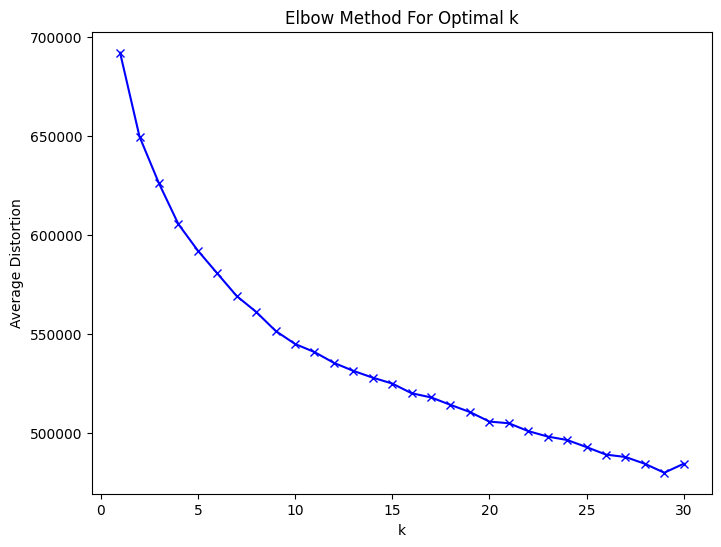

In [8]:
# Determining the ideal k value using the Elbow Method
distortions = []
K = range(1, 31)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

# **A3**

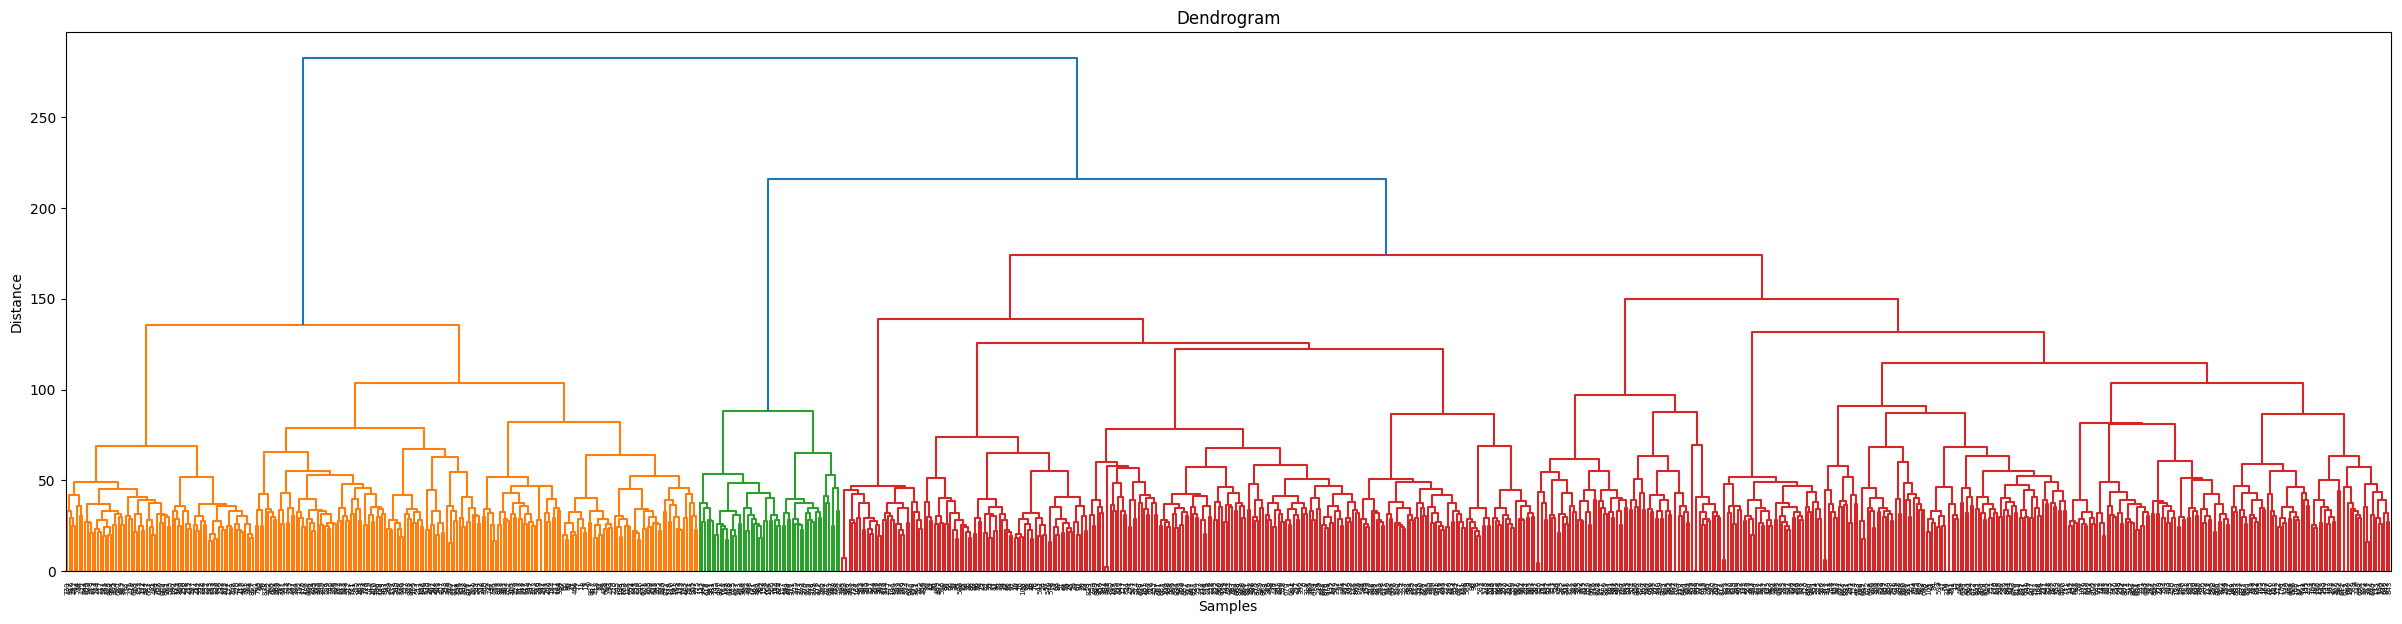

In [9]:
import scipy.cluster.hierarchy as sch

# Hierarchical clustering using Agglomerative Clustering
plt.figure(figsize=(30, 7))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# **A4**

In [10]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
# Separating features and target

X = data.drop(columns=['Score'])  # Features
y = data['Score']  # Target

# Selecting only numeric columns for feature selection
numeric_columns = X.select_dtypes(include=['number']).columns.tolist()
X_numeric = X[numeric_columns]

# Scaling numeric data for feature selection
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Sequential Feature Selector
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=1)
selector.fit(X_scaled, y)

# Getting selected features
selected_features = X_numeric.columns[selector.support_]


In [11]:
from sklearn.decomposition import PCA

# Performing PCA on scaled data
pca = PCA(n_components=0.95)  # Captures 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Getting the no.of components/features needed for 95% variance
num_features_for_95_variance = pca.n_components_

# Printting the no.of components/features needed for 95% variance
print("Number of features needed for 95% variance in PCA:", num_features_for_95_variance)

Number of features needed for 95% variance in PCA: 191


# **A5**

In [12]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# PCA with K components
K = 10  # Update with the desired number of components
pca = PCA(n_components=K)
X_pca = pca.fit_transform(X_scaled)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Model (Logistic Regression as an example)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Calculating accuracy using the transformed dataset
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using transformed dataset:", accuracy)

Accuracy using transformed dataset: 0.6055555555555555
